In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

In [3]:
df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358406,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.270004,119548600
2024-08-06,205.300003,209.990005,201.070007,207.229996,207.229996,69660500
2024-08-07,206.899994,213.639999,206.389999,209.820007,209.820007,63516400
2024-08-08,213.110001,214.199997,208.830002,213.309998,213.309998,47161100
2024-08-09,212.100006,216.779999,211.970001,216.240005,216.240005,42171700


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358406,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [6]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


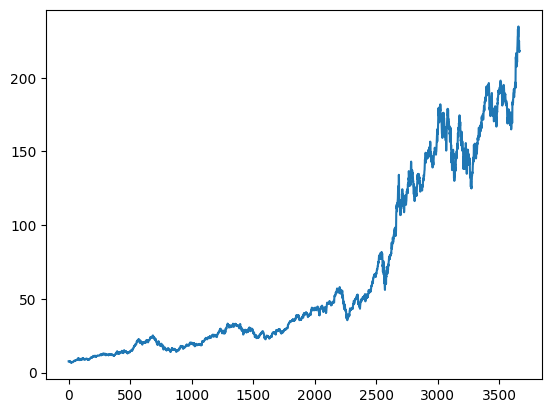

In [7]:
plt.plot(df.Close)

In [8]:
# 100 days moving average
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3661    190.1133
3662    190.4912
3663    190.8695
3664    191.2981
3665    191.7793
Name: Close, Length: 3666, dtype: float64

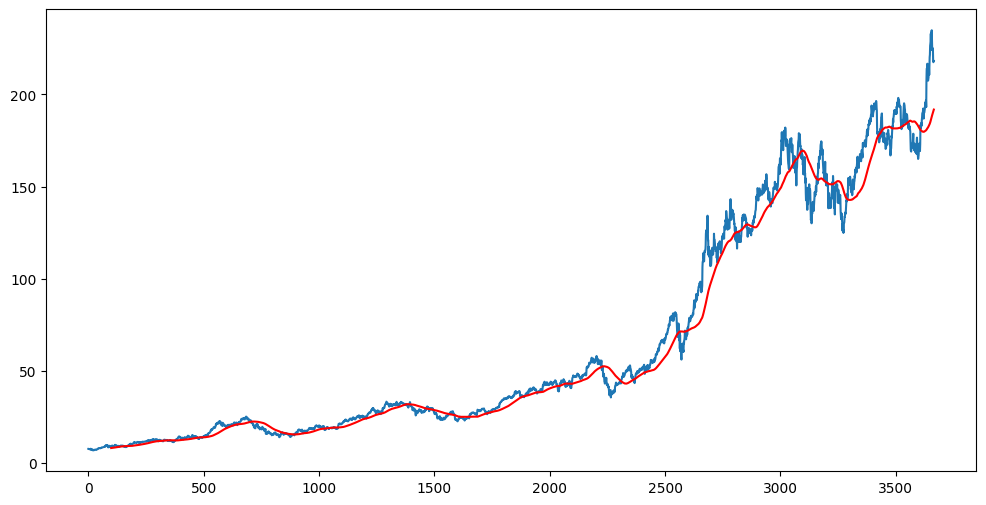

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
# 200 days moving average
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3661    187.90420
3662    188.12235
3663    188.32235
3664    188.51720
3665    188.71645
Name: Close, Length: 3666, dtype: float64

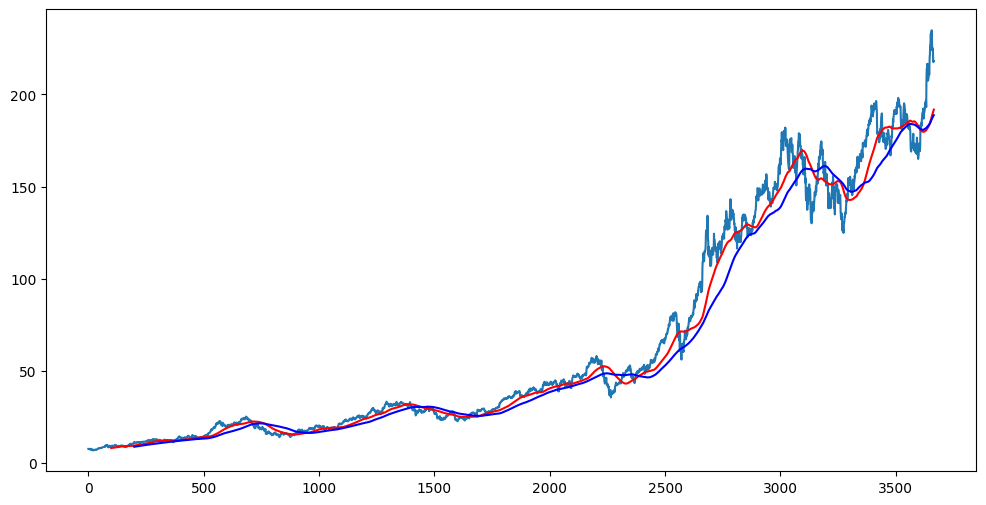

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'b')

In [12]:
df.shape

(3666, 5)

In [13]:
# Train and Test Split

df_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
df_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(df_training.shape)
print(df_testing.shape)

(2566, 1)
(1100, 1)


In [14]:
df_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
# preprocessing - Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(df_training)

In [17]:
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.82729758],
       [0.73655963],
       [0.83577093]])

In [18]:
#making data prepare for training
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
y_train

array([0.02921342, 0.0308957 , 0.03277813, ..., 0.82729758, 0.73655963,
       0.83577093])

In [20]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1] ,1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1] ,1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [31]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
78/78 [==============================] - 70s 817ms/step - loss: 0.0209
Epoch 2/50
78/78 [==============================] - 66s 840ms/step - loss: 0.0044
Epoch 3/50
78/78 [==============================] - 65s 839ms/step - loss: 0.0039
Epoch 4/50
78/78 [==============================] - 67s 854ms/step - loss: 0.0035
Epoch 5/50
78/78 [==============================] - 65s 839ms/step - loss: 0.0034
Epoch 6/50
78/78 [==============================] - 65s 826ms/step - loss: 0.0033
Epoch 7/50
78/78 [==============================] - 65s 837ms/step - loss: 0.0029
Epoch 8/50
78/78 [==============================] - 66s 844ms/step - loss: 0.0030
Epoch 9/50
78/78 [==============================] - 65s 827ms/step - loss: 0.0027
Epoch 10/50
78/78 [==============================] - 65s 838ms/step - loss: 0.0027
Epoch 11/50
78/78 [==============================] - 67s 853ms/step - loss: 0.0024
Epoch 12/50
78/78 [==============================] - 65s 829ms/step - loss: 0.0022
Epoch 13/50
7

In [33]:
import pickle
with open('lstm_stock_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://6aab4aef-786a-4029-a484-4bb88cb4234c/assets


In [34]:
model.save('keras_lstm_model.h5')